<a href="https://colab.research.google.com/github/anshulas06/covid-19-detection/blob/main/Covid_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
import os
import cv2
import keras
import tensorflow as tf
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator 
import tensorflow.keras.layers as Layers
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizers
import sklearn.utils as shuffle
import matplotlib.pyplot as plt
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPooling2D,MaxPool2D,AveragePooling2D,GlobalMaxPooling2D, BatchNormalization

In [ ]:
Images = []
Labels = []
Covid = os.listdir("COVID-19_Radiography_Dataset/COVID/")
for i in Covid:
    try:
        image = cv2.imread("COVID-19_Radiography_Dataset/COVID/" + i)
        images = Image.fromarray(image, 'RGB')
        images = images.resize((150,150))
        Images.append(np.array(images))
        Labels.append(0)
    except AttributeError:
        print('')
Normal = os.listdir("COVID-19_Radiography_Dataset/Normal/")
for i in Normal:
    try:
        image = cv2.imread("COVID-19_Radiography_Dataset/Normal/" + i)
        images = Image.fromarray(image, 'RGB')
        images = images.resize((150,150))
        Images.append(np.array(images))
        Labels.append(1)
    except AttributeError:
        print('')

In [ ]:
Images = np.array(Images)
Labels = np.array(Labels)
print(Images.shape)
print(Labels.shape)


(13808, 150, 150, 3)
(13808,)


In [ ]:
def show_images(image, label):
    fig = plt.figure(figsize = (10,10))
    fig.suptitle('Images from dataset', fontsize = 20)
    for i in range(16):
        index = np.random.randint(Images.shape[0])
        plt.subplot(4,4,i+1)
        plt.imshow(image[index])
        plt.xticks([]) #to hide scale
        plt.yticks([])
        plt.title((label[index]))
        plt.grid(False)
    plt.show()

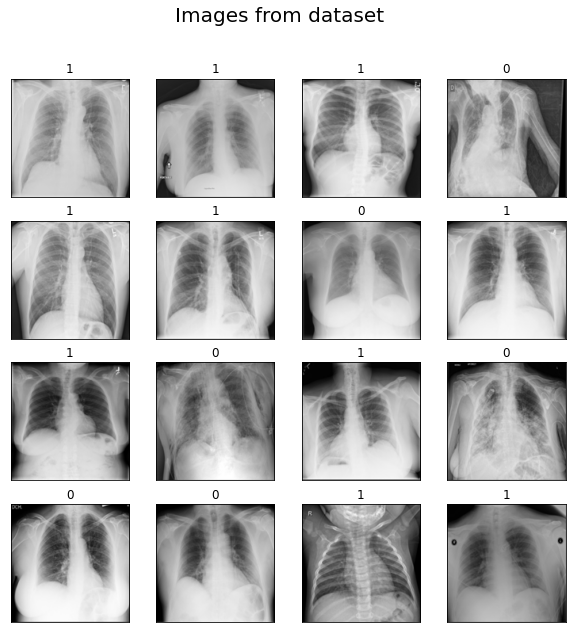

In [ ]:
show_images(Images, Labels)

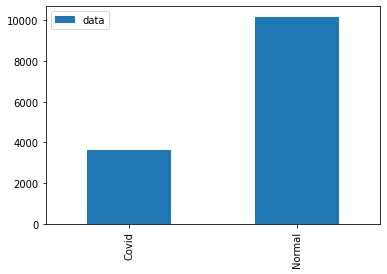

In [ ]:
category = ['Covid', 'Normal']
_,count = np.unique(Labels, return_counts = True)
pd.DataFrame({'data': count}, index = category).plot.bar()
plt.show()

In [ ]:
train_x,test_x, train_y, test_y = train_test_split(Images,Labels, test_size = 0.2, random_state = 100)

In [ ]:
train_x = train_x.reshape(train_x.shape[0], 150, 150, 3)
test_x = test_x.reshape(test_x.shape[0], 150, 150, 3)

In [ ]:
model = Models.Sequential()
model.add(Layers.Conv2D(64, kernel_size = (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(Layers.MaxPool2D(2,2))
model.add(BatchNormalization(axis=-1))
model.add(Layers.Dropout(0.2))
model.add(Layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(Layers.MaxPool2D(2,2))
model.add(BatchNormalization(axis=-1))
model.add(Layers.Dropout(0.2))
model.add(Layers.Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(Layers.MaxPool2D(2,2))
model.add(BatchNormalization(axis=-1))
model.add(Layers.Dropout(0.2))
model.add(Layers.Conv2D(128, kernel_size = (3,3), activation = 'relu', padding='same'))
model.add(Layers.MaxPool2D(2,2))
model.add(BatchNormalization(axis=-1))
model.add(Layers.Dropout(0.2))
model.add(Layers.Conv2D(256, kernel_size = (3,3), activation = 'relu', padding='same'))
model.add(Layers.MaxPool2D(2,2))
model.add(BatchNormalization(axis=-1))
model.add(Layers.Dropout(0.2))
model.add(Layers.Conv2D(256, kernel_size = (3,3), activation = 'relu'))
model.add(Layers.MaxPool2D(2,2))
model.add(BatchNormalization(axis=-1))
model.add(Layers.Dropout(0.2))
model.add(Layers.Flatten())
model.add(Layers.Dense(512, activation = 'relu'))
model.add(BatchNormalization(axis=-1))
model.add(Layers.Dense(256, activation = 'relu'))
model.add(BatchNormalization(axis=-1))
model.add(Layers.Dense(1, activation = 'sigmoid'))


model.compile(optimizer = Optimizers.Adam(learning_rate=0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 74, 74, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0

In [ ]:
trained = model.fit(train_x, train_y, epochs = 50, batch_size = 50, validation_split = 0.25, verbose = 1)

Epoch 1/50
166/166 [==============================] - 55s 136ms/step - loss: 0.4356 - accuracy: 0.8182 - val_loss: 2.0244 - val_accuracy: 0.7353
Epoch 2/50
166/166 [==============================] - 21s 124ms/step - loss: 0.2596 - accuracy: 0.8893 - val_loss: 0.6075 - val_accuracy: 0.7060
Epoch 3/50
166/166 [==============================] - 21s 124ms/step - loss: 0.2070 - accuracy: 0.9171 - val_loss: 0.2599 - val_accuracy: 0.8888
Epoch 4/50
166/166 [==============================] - 21s 129ms/step - loss: 0.1666 - accuracy: 0.9347 - val_loss: 0.4306 - val_accuracy: 0.8230
Epoch 5/50
166/166 [==============================] - 21s 124ms/step - loss: 0.1485 - accuracy: 0.9419 - val_loss: 0.2472 - val_accuracy: 0.9037
Epoch 6/50
166/166 [==============================] - 21s 124ms/step - loss: 0.1384 - accuracy: 0.9485 - val_loss: 1.4852 - val_accuracy: 0.5453
Epoch 7/50
166/166 [==============================] - 21s 124ms/step - loss: 0.1170 - accuracy: 0.9561 - val_loss: 0.3033 - val_ac

In [ ]:
result = model.evaluate(test_x,test_y,verbose = 1)

87/87 [==============================] - 3s 27ms/step - loss: 0.2047 - accuracy: 0.9450


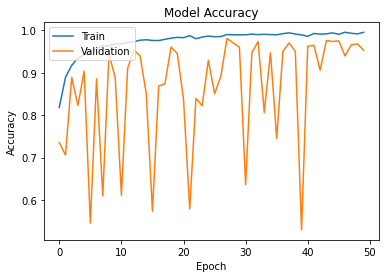

In [ ]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "upper left")
plt.show()

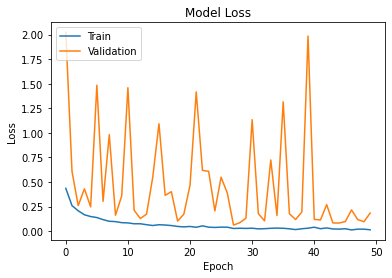

In [ ]:
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "upper left")
plt.show()